In [48]:
import numpy as np
import pandas as pd
import mikeio

source: https://dhi.github.io/getting-started-with-mikeio/dfs0.html

本节主要使用mikeio对dfs0文件进行处理，主要包括：
1. 读取dfs0文件 mikeio.read('file path')
2. 写入dfs0文件 df.to_dfs0()
3. dfs0与csv(dataframe)互相转换 ds.to_dataframe()
4. 设置变量的类型和单位 from mikeio.EUM import ItemInfo, EUMType, EUMUnit
5. 查询系统中变量的类型（关键字）和单位 EUMType.search('wind')   EUMType.Wind_speed.units
6. 选择某列（by col_number or col_name）mikeio.read('file path', items = [1,4] or mikeio.read('file path', items = ['name1', 'name2']))

# Reading data

mikeio can be used by all dfs classes (dfs0, dfs1, dfs2, dfs3, dfsu)
dfs0 data are best handled by a Pandas DataFrame.

In [5]:
ds = mikeio.read("D:\project\88802527_Anma_do\KMA\dfs0\Buan.dfs0")
ds

C:\Users\jiyu\Anaconda3\lib\site-packages\mikeio\dataset.py:258: UserWarning: Indexing in MIKE IO 1.0 will not return a numpy array, but a mikeio.DataArray. More info: https://github.com/DHI/mikeio#readme
  warnings.warn(


<mikeio.Dataset>
Dimensions: (52849,)
Time: 2015-12-21 15:00:00 - 2021-12-31 15:00:00
Number of items: 12

In [7]:
type(ds)

mikeio.dataset.Dataset

In [9]:
df = ds.to_dataframe() # convert dataset to dataframe
df

,Wind Speed,Wind Direction,Gust Wind Speed,Local Air Pressure,Humidity,Temperature,Air Temperature,Max Wave,Significant Wave,Average Wave,Wave Period,Wave Direction
2015-12-21 15:00:00,2.2,2.0,3.3,1030.000000,61.0,9.3,12.1,1.9,1.1,0.8,5.3,258.0
2015-12-21 16:00:00,3.5,24.0,5.7,1029.400024,63.0,9.0,12.1,1.4,1.0,0.7,5.3,140.0
2015-12-21 17:00:00,5.8,42.0,7.9,1029.099976,66.0,9.2,12.1,1.4,0.8,0.6,5.3,112.0
2015-12-21 18:00:00,6.8,46.0,9.1,1029.099976,67.0,8.9,12.2,1.6,0.9,0.6,4.9,118.0
2015-12-21 19:00:00,6.4,46.0,9.1,1029.400024,71.0,9.1,12.2,1.2,0.8,0.5,5.3,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 11:00:00,9.4,7.0,12.2,1032.500000,65.0,0.9,11.4,3.3,1.9,1.3,6.4,330.0
2021-12-31 12:00:00,7.9,12.0,11.1,1032.800049,58.0,0.6,11.4,2.8,1.7,1.2,6.4,337.0
2021-12-31 13:00:00,7.9,10.0,10.7,1032.900024,63.0,1.0,11.3,2.9,1.8,1.3,7.1,337.0
2021-12-31 14:00:00,7.2,8.0,11.4,1033.099976,61.0,1.1,11.3,2.7,1.5,1.0,5.8,323.0


# Writing Data 
convert pandas DataFrame (csv) to dfs0

In [15]:
df = pd.read_csv(r"D:\project\88802527_Anma_do\KMA\22186Buan\combined.csv", parse_dates = True, index_col = 1) #use 'index_col' to set DATE col as index
df

,Unnamed: 0,Point,Wind Speed (m/s),Wind Direction (deg),GUST Wind Speed (m/s),Local Air Pressure (hPa),Humidity,Temperature,Water Temperature,Maximum Wave (m),Significant Wave (m),Average Wave (m),Wave Cycle (sec),Ripple (deg)
Date,,,,,,,,,,,,,,
2015-12-22 00:00:00,0,22186.0,2.2,2.0,3.3,1030.0,61.0,9.3,12.1,1.9,1.1,0.8,5.3,258.0
2015-12-22 01:00:00,1,22186.0,3.5,24.0,5.7,1029.4,63.0,9.0,12.1,1.4,1.0,0.7,5.3,140.0
2015-12-22 02:00:00,2,22186.0,5.8,42.0,7.9,1029.1,66.0,9.2,12.1,1.4,0.8,0.6,5.3,112.0
2015-12-22 03:00:00,3,22186.0,6.8,46.0,9.1,1029.1,67.0,8.9,12.2,1.6,0.9,0.6,4.9,118.0
2015-12-22 04:00:00,4,22186.0,6.4,46.0,9.1,1029.4,71.0,9.1,12.2,1.2,0.8,0.5,5.3,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,52843,22186.0,9.2,2.0,13.4,1032.8,60.0,1.1,11.4,3.1,1.9,1.4,7.1,332.0
2021-12-31 20:00:00,52844,22186.0,9.4,7.0,12.2,1032.5,65.0,0.9,11.4,3.3,1.9,1.3,6.4,330.0
2021-12-31 21:00:00,52845,22186.0,7.9,12.0,11.1,1032.8,58.0,0.6,11.4,2.8,1.7,1.2,6.4,337.0


<AxesSubplot:xlabel=' Date'>

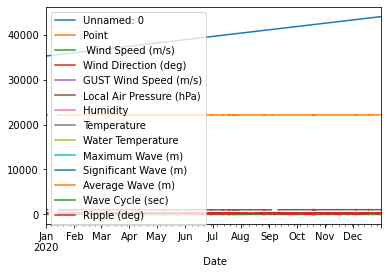

In [17]:
df.loc['2020'].plot()

In [16]:
df.to_dfs0('Buan_from_csv.dfs0')

In [20]:
saved_ds = mikeio.read('Buan_from_csv.dfs0')
saved_ds

<mikeio.Dataset>
Dimensions: (52848,)
Time: 2015-12-22 00:00:00 - 2021-12-31 23:00:00
Number of items: 14

Specify the undefined data EUM types

In [22]:
df2 = df.iloc[:, 2:4] 
df2

,Wind Speed (m/s),Wind Direction (deg)
Date,,
2015-12-22 00:00:00,2.2,2.0
2015-12-22 01:00:00,3.5,24.0
2015-12-22 02:00:00,5.8,42.0
2015-12-22 03:00:00,6.8,46.0
2015-12-22 04:00:00,6.4,46.0
...,...,...
2021-12-31 19:00:00,9.2,2.0
2021-12-31 20:00:00,9.4,7.0
2021-12-31 21:00:00,7.9,12.0


In [36]:
from mikeio.eum import ItemInfo, EUMType, EUMUnit # Notice:可能因为版本更新，‘mikeio.eum’, instead of 'mikeio'

df2.to_dfs0('Buan_eum.dfs0',
           items=[
               ItemInfo(EUMType.Wind_speed, EUMUnit.meter_per_sec),
               ItemInfo(EUMType.Wind_Direction,EUMUnit.degree)
           ])

In [38]:
mikeio.read('Buan_eum.dfs0')

C:\Users\jiyu\Anaconda3\lib\site-packages\mikeio\dataset.py:258: UserWarning: Indexing in MIKE IO 1.0 will not return a numpy array, but a mikeio.DataArray. More info: https://github.com/DHI/mikeio#readme
  warnings.warn(


<mikeio.Dataset>
Dimensions: (52848,)
Time: 2015-12-22 00:00:00 - 2021-12-31 23:00:00
Items:
  0:  Wind speed <Wind speed> (meter per sec)
  1:  Wind Direction <Wind Direction> (degree)

In [34]:
# 如何确认数据类型和对应单位
# 注意大小写和是否缩写，空格-> '_'
EUMType.search('wind')


[Wind Velocity,
 Wind Direction,
 Wind friction factor,
 Wind speed,
 Depth of Wind,
 Wind friction speed]

In [35]:
EUMType.Wind_speed.units

[meter per sec, feet per sec, knot, km per hour, miles per hour]

# Selecting items 

In [41]:
ds1 = mikeio.read("D:\project\88802527_Anma_do\KMA\dfs0\Buan.dfs0", items = [1,4])
ds1 #根据列数（数字）来选择，选择第1和4列。start from 0

<mikeio.Dataset>
Dimensions: (52849,)
Time: 2015-12-21 15:00:00 - 2021-12-31 15:00:00
Items:
  0:  Wind Direction <Wave direction> (radian)
  1:  Humidity <Undefined> (undefined)

In [45]:
ds2 = mikeio.read("D:\project\88802527_Anma_do\KMA\dfs0\Buan.dfs0", items = [1,2,4])
ds2 #根据列数（数字）来选择，选择第1和4列。start from 0
# 不能使用 1：4进行选择

<mikeio.Dataset>
Dimensions: (52849,)
Time: 2015-12-21 15:00:00 - 2021-12-31 15:00:00
Items:
  0:  Wind Direction <Wave direction> (radian)
  1:  Gust Wind Speed <Undefined> (undefined)
  2:  Humidity <Undefined> (undefined)

In [47]:
ds3 = mikeio.read("D:\project\88802527_Anma_do\KMA\dfs0\Buan.dfs0", items = ['Humidity','Wind Direction'])
ds3 #根据列名来选择。可以改变列的顺序

<mikeio.Dataset>
Dimensions: (52849,)
Time: 2015-12-21 15:00:00 - 2021-12-31 15:00:00
Items:
  0:  Humidity <Undefined> (undefined)
  1:  Wind Direction <Wave direction> (radian)